In [1]:
import pandas as pd
import numpy as np

from sklearn.cluster import KMeans

from sklearn.preprocessing import StandardScaler, MinMaxScaler

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Iris.csv")
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
x = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
x

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


<AxesSubplot: xlabel='index', ylabel='value'>

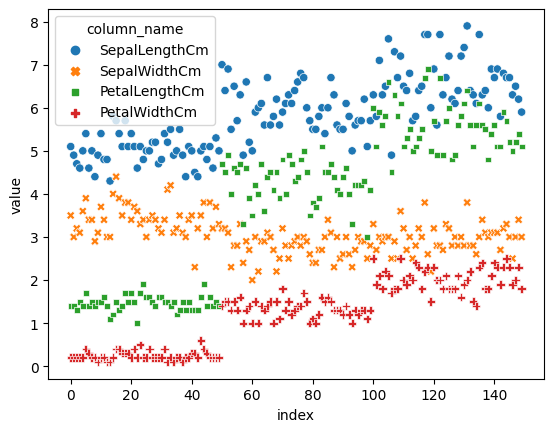

In [4]:
df_inv = df.reset_index()
columns = ['index', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
df_to_plot = df_inv[columns]

df_to_plot = pd.melt(frame = df_to_plot,
                     id_vars = 'index',
                     var_name = 'column_name',
                     value_name = 'value')
fig, ax = plt.subplots()

sns.scatterplot(ax = ax, data = df_to_plot, x = 'index', y = 'value', style = 'column_name', hue = 'column_name')

# Scaling

In [5]:
std_scalar = StandardScaler()
array = std_scalar.fit_transform(x)

x = pd.DataFrame(array, columns=x.columns)
x

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977
...,...,...,...,...
145,1.038005,-0.124958,0.819624,1.447956
146,0.553333,-1.281972,0.705893,0.922064
147,0.795669,-0.124958,0.819624,1.053537
148,0.432165,0.800654,0.933356,1.447956


# Model Building

In [6]:
kmean_model = KMeans(n_clusters=3)
y_pred = kmean_model.fit_predict(x)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [7]:
np.where(y_pred == 1)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
       dtype=int64),)

In [8]:
np.where(y_pred == 0)

(array([ 53,  54,  55,  57,  58,  59,  60,  61,  62,  63,  64,  66,  67,
         68,  69,  71,  72,  73,  74,  78,  79,  80,  81,  82,  83,  84,
         87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,  98,  99,
        101, 106, 113, 114, 119, 121, 123, 126, 133, 134, 138, 142, 146,
        149], dtype=int64),)

# WCSS

In [ ]:
WCSS >> Within Cluster Sum off Squares

In [9]:
kmean_model

KMeans(n_clusters=3)

In [10]:
kmean_model.inertia_

140.96581663074699

In [11]:
kmean_model = KMeans(n_clusters=6)
y_pred = kmean_model.fit_predict(x)

kmean_model.inertia_

80.18539211415842

# Elbow Method

In [14]:
k_values = range(1,7)
wcss_list = []

for i in k_values:
    kmean_model = KMeans(n_clusters=i)
    y_pred = kmean_model.fit_predict(x)

    wcss = kmean_model.inertia_
    wcss_list.append(wcss)
    
    print(i, ">>", wcss)

1 >> 600.0
2 >> 223.73200573676348
3 >> 140.96837895511078
4 >> 114.61550694959809
5 >> 91.02916928379733
6 >> 80.16673247032298


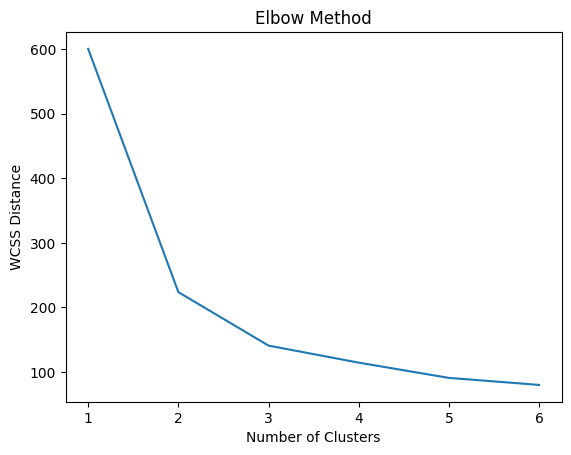

In [15]:
plt.plot(k_values, wcss_list)
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS Distance")
plt.title("Elbow Method")
plt.savefig("Elbow_Method.png")